Trần Hoàn Đức Duy 19521434

In [7]:
%cd /content/drive/MyDrive/Programming/Python for machine learning

/content/drive/MyDrive/Programming/Python for machine learning


#Define necessary modules

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [198]:
def evaluation_kfold(model,X,y):
  kf = KFold(n_splits=5)
  train_accuracies = []
  val_accuracies = []
  for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    
    model.fit(X_train,y_train)

    train_accuracies.append(model.score(X_train,y_train))
    val_accuracies.append(model.score(X_val,y_val))
  
  print('Train accuracy: ',np.mean(train_accuracies))
  print('Validation accuracy: ',np.mean(val_accuracies))
  return model,scaler

#Simple linear regression

## Bước 1: đọc dữ liệu từ các file data

In [295]:
ds = pd.read_csv('data/Salary_Data.csv')
ds.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


##Bước 2, 3, 4, 5

In [296]:
ds = ds.sample(frac=1)
X, y = ds.iloc[:,:-1].to_numpy(),ds.iloc[:,-1].to_numpy()

In [297]:
from sklearn.linear_model import LinearRegression

In [298]:
Simple_LR = LinearRegression()
Simple_LR,scaler = evaluation_kfold(Simple_LR,X,y)

Train accuracy:  0.9561961995206847
Validation accuracy:  0.9406129180936255


##Bước 6: trực quan hóa dữ liệu

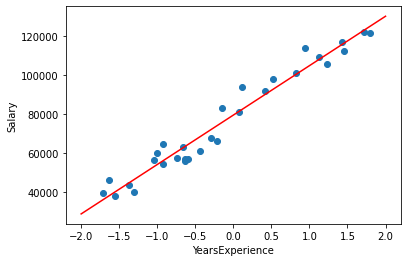

In [300]:
w,b = Simple_LR.coef_, Simple_LR.intercept_
X, y = ds.iloc[:,:-1].to_numpy(),ds.iloc[:,-1].to_numpy()
X = scaler.transform(X)

X_axis = np.linspace(-2,2,30)
plt.figure()
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(X,y)
plt.plot(X_axis,X_axis*w+b,color = 'red')
plt.show()

#Multiple linear Repression

In [204]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

##Bước 1: đọc dữ liệu

In [278]:
ds = pd.read_csv('data/50_Startups.csv')
ds.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


##Bước 2, 3, 4, 5

In [279]:
ds = ds.sample(frac=1)
X, y = ds.iloc[:,:-1].to_numpy(),ds.iloc[:,-1].to_numpy()

In [280]:
X[:,3] = LabelEncoder().fit_transform(X[:,3])

In [281]:
Multiple_LR = LinearRegression()

kf = KFold(n_splits=5)
train_accuracies = []
val_accuracies = []
for train_index, val_index in kf.split(X):
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  columnTransfer_x = ColumnTransformer([('encoder', OneHotEncoder(sparse=False),[3]), ('norm', Normalizer(), [0,1,2])], remainder='passthrough')
  scaler = columnTransfer_x.fit(X_train)

  X_train = columnTransfer_x.transform(X_train)
  X_val = columnTransfer_x.transform(X_val)
  
  Multiple_LR.fit(X_train,y_train)
  train_accuracies.append(Multiple_LR.score(X_train,y_train))
  val_accuracies.append(Multiple_LR.score(X_val,y_val))

print('Train accuracy: ',np.mean(train_accuracies))
print('Validation accuracy: ',np.mean(val_accuracies))

Train accuracy:  0.8145633223158548
Validation accuracy:  0.7230175206162986


##Bước 6: Trực quan hóa dữ liệu

In [282]:
W = Multiple_LR.coef_
b = Multiple_LR.intercept_

In [283]:
from mpl_toolkits.mplot3d import Axes3D

In [284]:
X = columnTransfer_x.transform(X)

In [293]:
x_pred = np.linspace(0, 0.8, 30) 
y_pred = np.linspace(0.2, 1, 30)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
pred_viz = model_viz.dot(W[3:5].T)

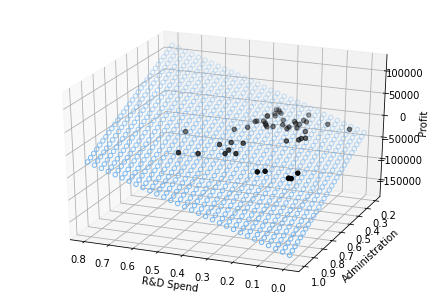

In [294]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')
ax.scatter(list(X[:,3]),list(X[:,4]),list(X[:,-1]),color = 'k')
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), pred_viz, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.view_init(elev=27, azim=112)
fig.tight_layout()